## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [30]:
import numpy as np 
import pandas as pd

In [3]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

'wget' is not recognized as an internal or external command,
operable program or batch file.


1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [31]:
 #part1
df=pd.read_csv('data_000637.txt',delimiter=',')[0:1500]
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1495,1,0,40,3869200182,350,19
1496,1,1,21,3869200182,349,8
1497,1,0,64,3869200182,346,15
1498,1,1,3,3869200182,398,8


In [8]:
 #part2
X = df["BX_COUNTER"].max()+1
print("The number of BX in a ORBIT is : ",X)


The number of BX in a ORBIT is :  3546


In [17]:
 #part3,4
df['ABS_TIMES(ns)']=df['TDC_MEAS']*25/30+df['BX_COUNTER']*25 + df['ORBIT_CNT']*X
print(df)

data_taking_last = df.loc[len(df)-1,'ABS_TIMES(ns)'] - df.loc[0,'ABS_TIMES(ns)']
print('data takeing lasted:', data_taking_last, ' ns')

      HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  ABS_TIMES(ns)
0        1     0          123  3869200167        2374        26   1.372018e+13
1        1     0          124  3869200167        2374        27   1.372018e+13
2        1     0           63  3869200167        2553        28   1.372018e+13
3        1     0           64  3869200167        2558        19   1.372018e+13
4        1     0           64  3869200167        2760        25   1.372018e+13
...    ...   ...          ...         ...         ...       ...            ...
1495     1     0           40  3869200182         350        19   1.372018e+13
1496     1     1           21  3869200182         349         8   1.372018e+13
1497     1     0           64  3869200182         346        15   1.372018e+13
1498     1     1            3  3869200182         398         8   1.372018e+13
1499     1     1           16  3869200182         406         5   1.372018e+13

[1500 rows x 7 columns]
data takeing lasted: 3972.5

In [19]:
 #part5
for index in df.index:
    df.loc[index,'HEAD'] = np.random.randint(2)
print(df.HEAD)


0       1
1       0
2       1
3       0
4       1
       ..
1495    1
1496    1
1497    0
1498    1
1499    0
Name: HEAD, Length: 1500, dtype: int64


In [22]:
 #part6
df_new=df[df["HEAD"]>0]
print(df_new)

      HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  ABS_TIMES(ns)
0        1     0          123  3869200167        2374        26   1.372018e+13
2        1     0           63  3869200167        2553        28   1.372018e+13
4        1     0           64  3869200167        2760        25   1.372018e+13
10       1     1            7  3869200167        2785         4   1.372018e+13
13       1     0           36  3869200167        2791        23   1.372018e+13
...    ...   ...          ...         ...         ...       ...            ...
1493     1     1            8  3869200182         350        25   1.372018e+13
1494     1     0          139  3869200182         348         0   1.372018e+13
1495     1     0           40  3869200182         350        19   1.372018e+13
1496     1     1           21  3869200182         349         8   1.372018e+13
1498     1     1            3  3869200182         398         8   1.372018e+13

[764 rows x 7 columns]


<IPython.core.display.Javascript object>


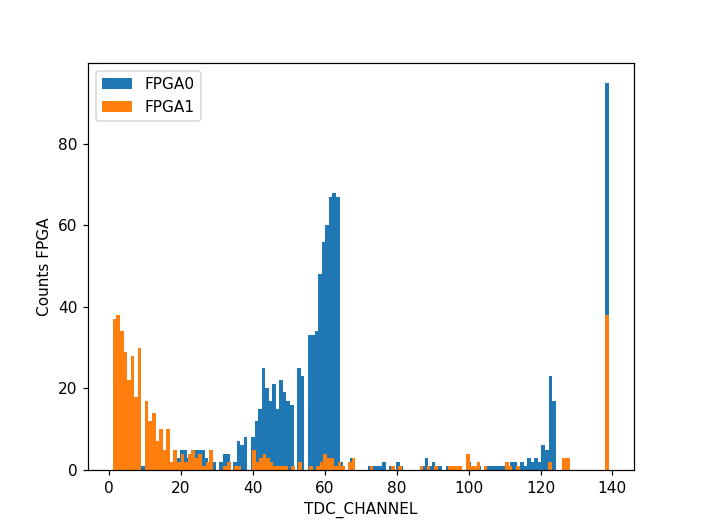

In [29]:
 #part7
import matplotlib.pyplot as plt
%matplotlib notebook
FPGA0 = df[df['FPGA'] == 0]['TDC_CHANNEL']
FPGA1 = df[df['FPGA'] == 1]['TDC_CHANNEL']

plt.xlabel("TDC_CHANNEL")
plt.ylabel("Counts FPGA")
plt.hist(FPGA0,bins=FPGA0.max(),label="FPGA0")
plt.hist(FPGA1,bins=FPGA1.max(),label="FPGA1")
plt.legend(loc="best")
plt.show()

In [42]:
 #part8
df.groupby('TDC_CHANNEL').sum()['HEAD'].nlargest(3)

TDC_CHANNEL
139    133
62      70
63      69
Name: HEAD, dtype: int64

In [53]:
 #part9
TDC_CHANNEL_139 = df[df['TDC_CHANNEL'] == 139]
TDC_CHANNEL_139.nunique()

HEAD             1
FPGA             2
TDC_CHANNEL      1
ORBIT_CNT       16
BX_COUNTER     129
TDC_MEAS         1
dtype: int64